##  1. Install Required Libraries 

In [1]:
pip install tweepy pandas numpy scikit-learn matplotlib nltk 

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   ---- ---------------------------------- 71.7/626.3 kB 787.7 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/626.3 kB 901.1 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/626.3 kB 958.1 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/626.3 kB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.5 MB/s eta 0:00:00
No

## 2. Importing Necassary Libraries 

In [9]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\savio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\savio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 3. Data Scraping Using Reddit API

In [3]:
pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/73/ca/60ec131c3b43bff58261167045778b2509b83922ce8f935ac89d871bd3ea/praw-7.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.4 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for update_checker>=0.18 from https://files.pythonhosted.org/packages/0c/ba/8dd7fa5f0b1c6a8ac62f8f57f7e794160c1f86f31c6d0fb00f582372a3e4/update_checker-0.18.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/189.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/189.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/189.3 kB ? eta -:--:--
   ------ -------------------------------- 30.7/189.3 kB 262.6 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/189.3 kB 217.9 kB/s eta 0:00:01
   

In [144]:
import requests
import praw
import pandas as pd


reddit = praw.Reddit(
    client_id="Your Client ID Here ",
    client_secret="your Client Secret Here ",
    user_agent = "projectname-script by /u/Reddit user name"
)

def fetch_reddit_posts(keywords, posts_per_keyword=20):
    """Fetch Reddit posts for each keyword, up to posts_per_keyword."""
    posts = []
    for keyword in keywords:
        subreddit_posts = reddit.subreddit("all").search(keyword, limit=posts_per_keyword)
        for post in subreddit_posts:
            posts.append({
                "Keyword": keyword,
                "Title": post.title,
                "Created": post.created_utc,
                "URL": post.url,
            })
    return posts


keywords = ["stocks","investing","trading","Tesla"]
posts = fetch_reddit_posts(keywords, posts_per_keyword=20)  # Fetch 20 posts per keyword
posts_df = pd.DataFrame(posts)
print(posts_df.head(10))

  Keyword                                              Title       Created  \
0  stocks   I've bought $10 of stocks every day for 3 years.  1.704124e+09   
1  stocks     How do people find stocks before they explode?  1.613058e+09   
2  stocks                Best long term stocks to invest in?  1.718893e+09   
3  stocks             What are some undervalued tech stocks?  1.728762e+09   
4  stocks             What are some undervalued stocks 2024?  1.709071e+09   
5  stocks                          Best stocks to invest in?  1.710205e+09   
6  stocks      Best growth stocks for the foreseeable future  1.715233e+09   
7  stocks                         penny stocks = best stocks  1.692324e+09   
8  stocks  Vaccine maker stocks fall as Trump chooses RFK...  1.731708e+09   
9  stocks                       You guys better stock up now  1.730898e+09   

                                                 URL  
0                https://i.redd.it/t4ly54l8nu9c1.png  
1  https://www.reddit.com/r/sto

In [145]:
import praw
reddit = praw.Reddit(
   client_id="Your Client ID Here ",
    client_secret="your Client Secret Here ",
    user_agent = "projectname-script by /u/Reddit user name"
)

rate_limit = reddit.auth.limits
print(f"Remaining requests in current window: {rate_limit['remaining']}")

Remaining requests in current window: None


## 4. Data Cleaning and Preprocessing

In [146]:
import re
from textblob import TextBlob
import pandas as pd


if posts:  
   
    posts_df = pd.DataFrame(posts)

    
    def clean_post(post):
        post = re.sub(r'http\S+', '', post)  
        post = re.sub(r'@\w+', '', post)    
        post = re.sub(r'#', '', post)       
        post = re.sub(r'\W', ' ', post)    
        return post.lower()


    posts_df['cleaned_post'] = posts_df['Title'].apply(clean_post)

  
    def get_sentiment(post):
        analysis = TextBlob(post)
        return analysis.sentiment.polarity

  
    posts_df['sentiment'] = posts_df['cleaned_post'].apply(get_sentiment)

 
    print(posts_df.head())
    

 
    positive_posts = posts_df[posts_df['sentiment'] > 0]
    negative_posts = posts_df[posts_df['sentiment'] < 0]
    neutral_posts = posts_df[posts_df['sentiment'] == 0]

    print(f"\nPositive Posts: {len(positive_posts)}")
    print(f"Negative Posts: {len(negative_posts)}")
    print(f"Neutral Posts: {len(neutral_posts)}")

else:
    print("No Reddit posts were scraped. Please check your API or keywords.")



  Keyword                                             Title       Created  \
0  stocks  I've bought $10 of stocks every day for 3 years.  1.704124e+09   
1  stocks    How do people find stocks before they explode?  1.613058e+09   
2  stocks               Best long term stocks to invest in?  1.718893e+09   
3  stocks            What are some undervalued tech stocks?  1.728762e+09   
4  stocks            What are some undervalued stocks 2024?  1.709071e+09   

                                                 URL  \
0                https://i.redd.it/t4ly54l8nu9c1.png   
1  https://www.reddit.com/r/stocks/comments/lhn99...   
2  https://www.reddit.com/r/stocks/comments/1dkcx...   
3  https://www.reddit.com/r/ValueInvesting/commen...   
4  https://www.reddit.com/r/ValueInvesting/commen...   

                                       cleaned_post  sentiment  
0  i ve bought  10 of stocks every day for 3 years       0.000  
1    how do people find stocks before they explode       0.000  
2    

In [147]:
saved_df = posts_df

In [148]:
posts_df['sentiment'].describe()

count    80.000000
mean      0.028987
std       0.287047
min      -0.500000
25%       0.000000
50%       0.000000
75%       0.008333
max       1.000000
Name: sentiment, dtype: float64

In [149]:
print(saved_df)

   Keyword                                              Title       Created  \
0   stocks   I've bought $10 of stocks every day for 3 years.  1.704124e+09   
1   stocks     How do people find stocks before they explode?  1.613058e+09   
2   stocks                Best long term stocks to invest in?  1.718893e+09   
3   stocks             What are some undervalued tech stocks?  1.728762e+09   
4   stocks             What are some undervalued stocks 2024?  1.709071e+09   
..     ...                                                ...           ...   
75   Tesla        Where Tesla started vs where they are today  1.729474e+09   
76   Tesla  What's the argument for a Tesla valuation this...  1.731166e+09   
77   Tesla  BMW overtakes Tesla. BMW has taken the lead in...  1.724403e+09   
78   Tesla  Elon Musk, Donald Trump event on X crashes sit...  1.723509e+09   
79   Tesla  Tesla CEO Elon Musk loses bid to get $56 billi...  1.733179e+09   

                                                  U

In [150]:
df = posts_df
df

,Keyword,Title,Created,URL,cleaned_post,sentiment
0,stocks,I've bought $10 of stocks every day for 3 years.,1.704124e+09,https://i.redd.it/t4ly54l8nu9c1.png,i ve bought 10 of stocks every day for 3 years,0.000
1,stocks,How do people find stocks before they explode?,1.613058e+09,https://www.reddit.com/r/stocks/comments/lhn99...,how do people find stocks before they explode,0.000
2,stocks,Best long term stocks to invest in?,1.718893e+09,https://www.reddit.com/r/stocks/comments/1dkcx...,best long term stocks to invest in,0.475
3,stocks,What are some undervalued tech stocks?,1.728762e+09,https://www.reddit.com/r/ValueInvesting/commen...,what are some undervalued tech stocks,0.000
4,stocks,What are some undervalued stocks 2024?,1.709071e+09,https://www.reddit.com/r/ValueInvesting/commen...,what are some undervalued stocks 2024,0.000
...,...,...,...,...,...,...
75,Tesla,Where Tesla started vs where they are today,1.729474e+09,https://i.redd.it/nnt4rxwhj0wd1.jpeg,where tesla started vs where they are today,0.000
76,Tesla,What's the argument for a Tesla valuation this...,1.731166e+09,https://i.redd.it/trbkql0i8wzd1.png,what s the argument for a tesla valuation this...,0.130
77,Tesla,BMW overtakes Tesla. BMW has taken the lead in...,1.724403e+09,https://ua-stena.info/en/bmw-overtakes-tesla-i...,bmw overtakes tesla bmw has taken the lead in...,0.125
78,Tesla,"Elon Musk, Donald Trump event on X crashes sit...",1.723509e+09,https://www.cnbc.com/2024/08/12/elon-musk-dona...,elon musk donald trump event on x crashes sit...,0.000


## 5. Sentiment Analysis Visualization

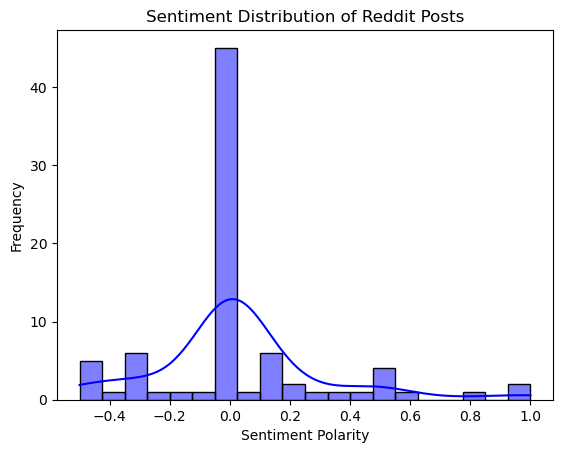

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.histplot(posts_df['sentiment'], bins=20, kde=True, color='blue')
plt.title('Sentiment Distribution of Reddit Posts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## 6. Feature Extraction and Model Building

In [62]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Tokenizer saved successfully.
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.3958 - loss: 1.0900 - val_accuracy: 0.6875 - val_loss: 1.0587
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5292 - loss: 64095.1836 - val_accuracy: 0.6875 - val_loss: 1.0313
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5167 - loss: 0.9381 - val_accuracy: 0.6875 - val_loss: 1.0221
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5833 - loss: 0.9223 - val_accuracy: 0.6875 - val_loss: 1.0242
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5625 - loss: 0.9075 - val_accuracy: 0.6875 - val_loss: 1.0213
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5250 - loss: 0.9374 - val_accuracy: 0.6875 - val_loss: 1.0144
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5750 - loss: 0.8717 - val_accuracy: 0.7500 - val_loss: 1.0043
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5917 - loss: 0.8431 - val_a

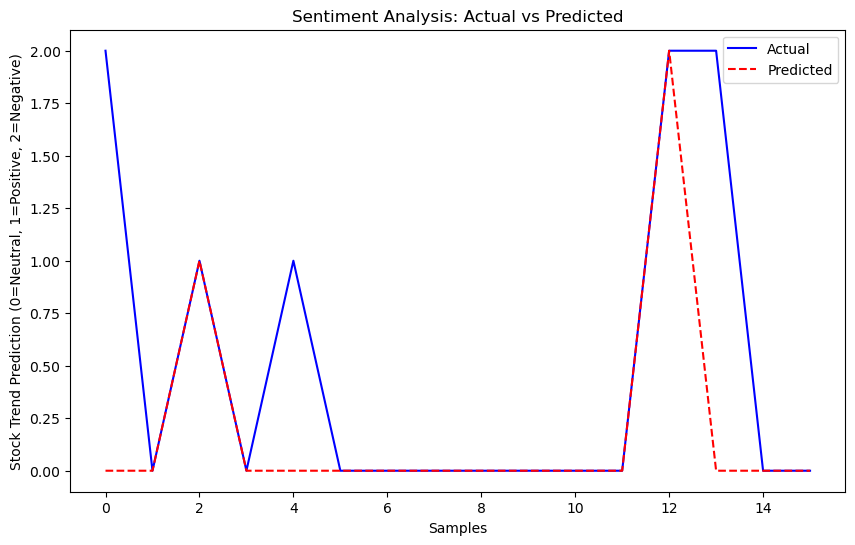

In [241]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
import numpy as np
from keras.layers import LSTM
from keras.optimizers import Nadam

saved_df['label'] = saved_df['sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else 2))
X = saved_df['cleaned_post'].tolist()
y = saved_df['label']
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X)  
X_seq = tokenizer.texts_to_sequences(X) 
X_pad = pad_sequences(X_seq, maxlen=100) 

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print("Tokenizer saved successfully.")
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.3))  # Increased dropout rate for regularization
model.add(GRU(128, dropout=0.3, recurrent_dropout=0.3))  # Use more units in GRU for better feature extraction
model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))
accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy[1])


predicted_sentiments = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color='blue')
plt.plot(range(len(predicted_sentiments)), np.argmax(predicted_sentiments, axis=1), label="Predicted", color='red', linestyle='--')
plt.legend()
plt.title("Sentiment Analysis: Actual vs Predicted")
plt.xlabel("Samples")
plt.ylabel("Stock Trend Prediction (0=Neutral, 1=Positive, 2=Negative)")
plt.show()

## 7. Evalutation of the GRU network Model 

In [242]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) 


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.50      0.67         2
           2       1.00      0.33      0.50         3

    accuracy                           0.81        16
   macro avg       0.93      0.61      0.68        16
weighted avg       0.85      0.81      0.78        16



## 8. Future Prediction of Stocks with Sample Datas

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


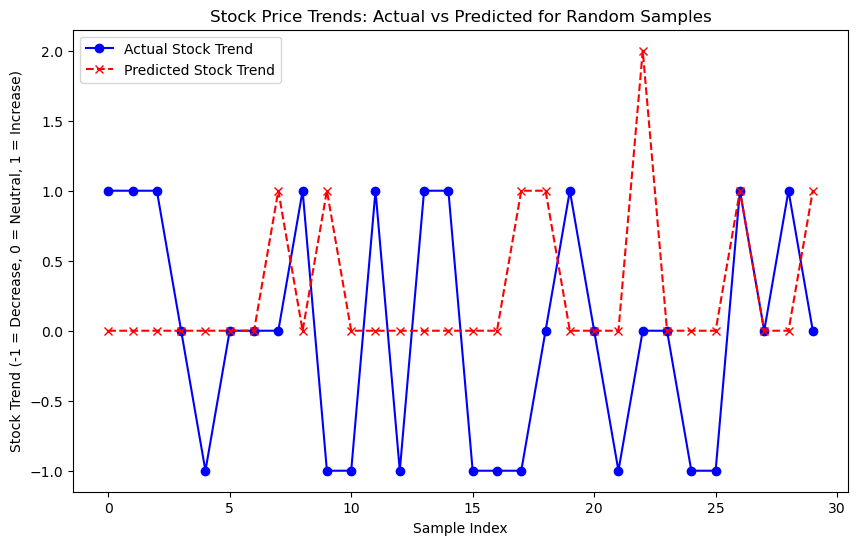

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

sample_texts = [
    "The stock market is soaring to new heights, with tech stocks leading the way!",  # Positive
    "Economic uncertainty is looming over the market, leading to a cautious outlook.",  # Negative
    "Positive outlook for the tech industry this quarter, with major innovations expected.",  # Positive
    "Investors are optimistic about the upcoming earnings report, anticipating strong growth.",  # Positive
    "Market dips amid global tensions but expected to recover, offering buying opportunities.",  # Neutral
    "Steady growth continues for major indices, signaling a stable economy.",  # Positive
    "Concerns over inflation impact stock prices negatively, causing investor anxiety.",  # Negative
    "Strong dollar boosts investor confidence in markets, especially in the export sector.",  # Positive
    "Sector rotation favors tech and healthcare stocks, leading to shifts in investment strategies.",  # Neutral
    "Weakening demand affects corporate profits and stock prices, signaling potential downturn.",  # Negative
    "Market sentiment shifts towards defensive stocks due to geopolitical instability.",  # Negative
    "Speculations about rate hikes lead to volatility in stocks, making investors nervous.",  # Negative
    "Strong job data boosts market optimism, especially for consumer-driven industries.",  # Positive
    "Tech innovation drives strong stock performance, with companies like Apple and Tesla leading.",  # Positive
    "Concerns over oil prices weigh on global markets, causing declines in energy stocks.",  # Negative
    "Federal Reserve policies stabilize financial markets, offering hope for long-term growth.",  # Positive
    "Banking stocks recover after initial pullback, signaling confidence in financial stability.",  # Positive
    "Global trade tensions ease, boosting market sentiment and driving stock prices up.",  # Positive
    "Weak dollar fuels rally in export-driven stocks, benefiting international companies.",  # Positive
    "Mixed earnings reports create uncertain market trends, causing volatility in stock prices.",  # Neutral
    "The technology sector is experiencing a major downturn, with stocks falling sharply.",  # Negative
    "Consumer confidence is on the rise, leading to expectations of strong retail performance.",  # Positive
    "A potential economic recession is on the horizon, sending stocks into a downward spiral.",  # Negative
    "The crypto market continues to fluctuate wildly, with no clear direction in sight.",  # Neutral
    "Strong earnings results from major corporations are driving stock prices to new highs.",  # Positive
    "The stock market faces heavy sell-offs due to political instability, causing widespread concern.",  # Negative
    "The housing market is cooling off, which may lead to declines in real estate stocks.",  # Negative
    "Innovation in renewable energy is expected to drive growth in green tech stocks.",  # Positive
    "The Federal Reserve signals an interest rate cut, providing a boost to the stock market.",  # Positive
    "Global economic slowdown affects consumer spending, leading to weaker retail stock performance."  # Negative
]


random_indices = np.random.choice(len(sample_texts), size=30, replace=True) 
random_text_samples = [sample_texts[i] for i in random_indices]


tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(sample_texts)  
X_seq_random = tokenizer.texts_to_sequences(random_text_samples) 
X_pad_random = pad_sequences(X_seq_random, maxlen=100) 


future_predictions = model.predict(X_pad_random)
future_predictions = np.argmax(future_predictions, axis=1)  


y_random = np.random.choice([0, 1, -1], size=30)  

plt.figure(figsize=(10, 6))

plt.plot(range(30), y_random, label="Actual Stock Trend", color='blue', marker='o')


plt.plot(range(30), future_predictions, label="Predicted Stock Trend", color='red', linestyle='--', marker='x')

plt.legend()
plt.title("Stock Price Trends: Actual vs Predicted for Random Samples")
plt.xlabel("Sample Index")
plt.ylabel("Stock Trend (-1 = Decrease, 0 = Neutral, 1 = Increase)")
plt.show()


In [244]:
model.save('model.h5')

## 9. Building  a Chatbot for Q&A using Gemini API

In [2]:
pip install google-generativeai

  Obtaining dependency information for google-generativeai from https://files.pythonhosted.org/packages/e9/2f/b5c1d62e94409ed98d5425e83b8e6d3dd475b611be272f561b1a545d273a/google_generativeai-0.8.3-py3-none-any.whl.metadata
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Obtaining dependency information for google-ai-generativelanguage==0.6.10 from https://files.pythonhosted.org/packages/af/6d/db99a295f9caf027bbdd90c41e6ea650a7468392a0e8713719e7abc5f647/google_ai_generativelanguage-0.6.10-py3-none-any.whl.metadata
  Using cached google_ai_generativelanguage-0.6.10-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for google-api-core from https://files.pythonhosted.org/packages/17/a4/c26886d57d90032c5f74c2e80aefdc38ec58551fc46bd4ce79fb2c9389fa/google_api_core-2.23.0-py3-none-any.whl.metadata
  Using cached google_api_core-2.23.0-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for google-api-python-client from https:/

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [257]:
import google.generativeai as genai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

genai.configure(api_key="Your Gemini API Key her")

text_samples = saved_df['Title'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_samples)
X_seq = tokenizer.texts_to_sequences(text_samples)
X_pad = pad_sequences(X_seq, maxlen=100)

future_predictions = np.random.choice([0, 1, -1], size=len(text_samples))

question_1 = f"""
Based on the following stock market sentiments: {', '.join(text_samples)}, is it the right time to invest in stocks right now? 
Please consider the current market trends, sentiment, and outlooks.
"""

question_2 = f"""
Given the following stock predictions and market trends: {', '.join(text_samples)}, 
mention some of the best stocks to purchase based on the current market sentiment.
"""

def get_gemini_response(question):
    try:
        # Requesting content from the Gemini model
        response = genai.GenerativeModel("gemini-1.5-flash").generate_content(question)

        # Check if the response has valid content
        if not response or not hasattr(response, 'text') or not response.text:
            raise ValueError("No valid response returned from the model.")

        # Make text inside quadruple asterisks bold and remove all asterisks
        formatted_text = response.text.replace("****", "").replace("*", "").replace("**", "")
        formatted_text = formatted_text.replace("****", "**")
        return formatted_text

    except Exception as e:
        print(f"Error generating content: {e}")
        return "Error: Unable to generate response"

response_1 = get_gemini_response(question_1)
response_2 = get_gemini_response(question_2)

print("Question 1: Is it the right time to invest in stocks?")
print(response_1)
print("\nQuestion 2: Best stocks to purchase")
print(response_2)


Question 1: Is it the right time to invest in stocks?
The provided text represents a diverse and often contradictory range of opinions and news snippets regarding the stock market, specific companies (Tesla, Trump's ventures), and investing strategies.  It's impossible to draw definitive conclusions or offer specific financial advice based solely on this chaotic collection of information.  However, we can identify some key themes and observations:

Market Sentiment & Outlooks:

 Volatility and Uncertainty: The sentiment is overwhelmingly mixed, reflecting significant uncertainty in the market.  There are reports of both substantial gains and significant losses, from various investment strategies (penny stocks, growth stocks, shorting, etc.).
 Political Influence:  The influence of political figures (Trump, Biden) and political events on market performance is heavily emphasized, highlighting the intertwined nature of politics and finance.
 Tech Sector Concerns: While there's interest in